In [1]:
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch.nn as nn
import pickle
import random as rd
import torch.optim as optim
import numpy as np
import sys as s
import matplotlib.pyplot as plt
import math


/home/v/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#           GERANDO O BANCO DE DADOS

In [2]:
from Dataset_Generator import Dataset
from Linear_model import Linear

In [35]:
Dataset(10,20,50)
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
XC = pickle.load(open("XC", "rb"))
print(XC[0][0])
n = np.shape(inp)[0]
n_b = np.shape(inp)[1]

XC = (10, 20, 1)
inp = torch.Size([10, 20, 50]) 10 conjunto(s) de 20 exemplos, cada um com 50 pontos 
out = torch.Size([10, 20, 50])
[34]


In [8]:
model = Linear()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
xc = rd.randint(0, 50)
epochs = 2000
for epoch in range(epochs):
    rnd_n = rd.randint(0,n-1)
    rnd_b = rd.randint(0,n_b-1)
    x = inp[rnd_n][rnd_b]
    y = out[rnd_n][rnd_b]
    x1=[]
    x2=[]
    y1=[]
    y2=[]
    for k in range(50):
        if x[k] <= xc:
            x1.append(x[k])
            y1.append(y[k])
        else:
            x2.append(x[k])
            y2.append(y[k])
    x1 = np.array(x1)
    x1 = torch.tensor(x1)
    x1 = x1.reshape(len(x1),1).float()
    x2 = np.array(x2)
    x2 = torch.tensor(x2)
    x2 = x2.reshape(len(x2),1).float()
    y1 = np.array(y1)
    y1 = torch.tensor(y1)
    y1 = y1.reshape(len(y1),1).float()
    y2 = np.array(y2)
    y2 = torch.tensor(y2)
    y2 = y2.reshape(len(y2),1).float()
    predict1 = model(x1,1)
    loss = torch.sum((predict1-y1)**2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())

    predict2 = model(x2,2)
    loss = torch.sum((predict2-y2)**2 )
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())

359.4412841796875
2698.561279296875
175.5562286376953
1109.800537109375
72.53427124023438
299.5425720214844
18.06382942199707
14.62899112701416
13.452521324157715
66.32452392578125
24.555999755859375
232.2841339111328
43.12481689453125
348.3255310058594
50.46984100341797
354.0907897949219
47.836181640625
257.010009765625
37.77292251586914
137.65872192382812
25.86913299560547
40.43791961669922
16.812355041503906
7.195046424865723
12.805521011352539
22.184494018554688
13.34894847869873
50.268455505371094
12.585926055908203
72.94580078125
14.315540313720703
70.71734619140625
19.474634170532227
54.213863372802734
12.142714500427246
21.21849250793457
11.034323692321777
4.405838966369629
13.561872482299805
9.332714080810547
12.298447608947754
14.992325782775879
12.131464958190918
23.837844848632812
7.414401531219482
17.282268524169922
13.081812858581543
18.29527473449707
13.123838424682617
12.278118133544922
12.753778457641602
7.999855041503906
9.711981773376465
2.785867691040039
9.809151649

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

x = inp[0][0]
y = out[0][0]
x1=[]
x2=[]
y1=[]
y2=[]
for k in range(50):
    if x[k] <= xc:
        x1.append(x[k])
        y1.append(y[k])
    else:
        x2.append(x[k])
        y2.append(y[k])
x1 = np.array(x1)
x1 = torch.tensor(x1)
x1 = x1.reshape(len(x1),1).float()
x2 = np.array(x2)
x2 = torch.tensor(x2)
x2 = x2.reshape(len(x2),1).float()
y1 = np.array(y1)
y1 = torch.tensor(y1)
y1 = y1.reshape(len(y1),1).float()
y2 = np.array(y2)
y2 = torch.tensor(y2)
y2 = y2.reshape(len(y2),1).float()
predict1 = model(x1,1).detach().numpy()
predict2 = model(x2,2).detach().numpy()

y1 = y1.detach().numpy().reshape(1,len(y1))
y2 = y2.detach().numpy().reshape(1,len(y2))
predict1 = predict1.reshape(1,len(predict1))
predict2 = predict2.reshape(1,len(predict2))


print(y1)
print(y2)
print(predict1)
print(predict2)

MSE_1 = mean_squared_error(predict1, y1)
RMSE_1 = mean_squared_error(predict1, y1,squared=False)
MAE_1 = mean_absolute_error(predict1, y1)

MSE_2 = mean_squared_error(predict2, y2)
RMSE_2 = mean_squared_error(predict2, y2,squared=False)
MAE_2 = mean_absolute_error(predict2, y2)



[[ 0.          0.81806296  0.82132816  0.07098494 -0.68536115 -0.7534899
  -0.12512437  0.5685112   0.68604827  0.1650588  -0.46628833 -0.62020606
  -0.19312425  0.37745526  0.556873    0.21137387 -0.3007888  -0.49671257
  -0.22160049  0.23509991  0.44018254  0.22535917]]
[[-0.17924924 -0.38757157 -0.22398932  0.13215794  0.33903036  0.21863614
  -0.09281502 -0.29459894 -0.2102711   0.06028202  0.25423     0.1997113
  -0.03369502 -0.21780889 -0.1876375   0.01226494  0.18517056  0.17461085
   0.00472373 -0.1561136  -0.16108832 -0.01791527  0.13041207  0.14743663
   0.02788601 -0.10782524 -0.13394494 -0.03514808]]
[[-0.00751849  0.90742314  0.7543837  -0.07125409 -0.40284836 -0.37386113
  -0.25458866 -0.15788849 -0.08930083 -0.04285999 -0.01161022  0.00975232
   0.02485423  0.03610735  0.04507165  0.05273943  0.05973081  0.0664299
   0.07306699  0.079778    0.08662586  0.0936449 ]]
[[-0.3010681  -0.25008515 -0.20572594 -0.16739634 -0.13455799 -0.10671833
  -0.08342841 -0.06427816 -0.0488

In [34]:
print('MSE_1 = {}'.format(MSE_1))
print('RMSE_1 = {}'.format(RMSE_1))
print('MAE_1 = {}'.format(MAE_1))
print('-----------------------------')
print('MSE_2 = {}'.format(MSE_2))
print('RMSE_2 = {}'.format(RMSE_2))
print('MAE_2 = {}'.format(MAE_2))
print('-----------')
print(xc)
print(XC[0][0])



MSE_1 = 0.1454830765724182
RMSE_1 = 0.3173025846481323
MAE_1 = 0.3173025846481323
-----------------------------
MSE_2 = 0.03565765544772148
RMSE_2 = 0.152804896235466
MAE_2 = 0.152804896235466
-----------
22
[1]


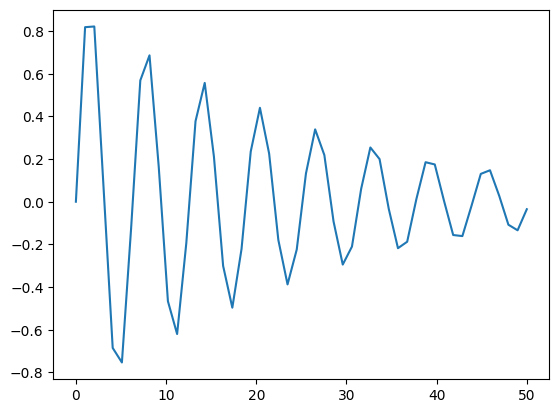

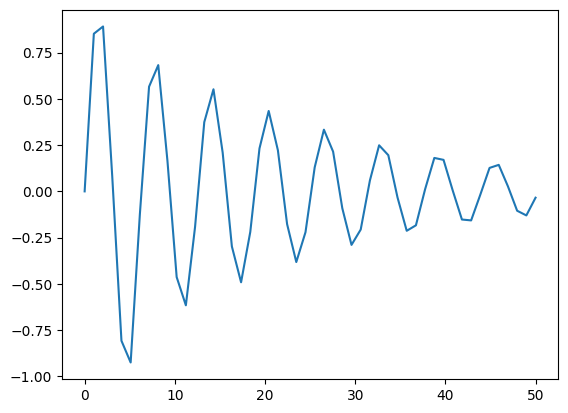

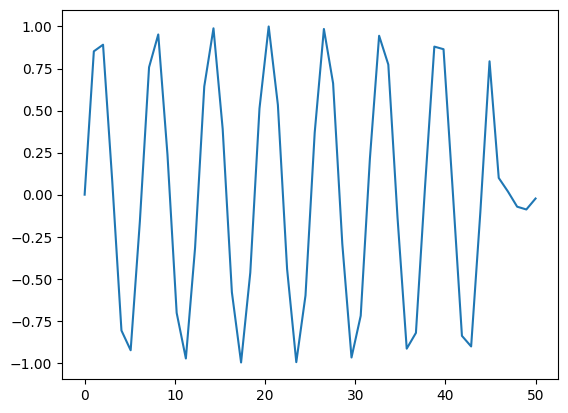

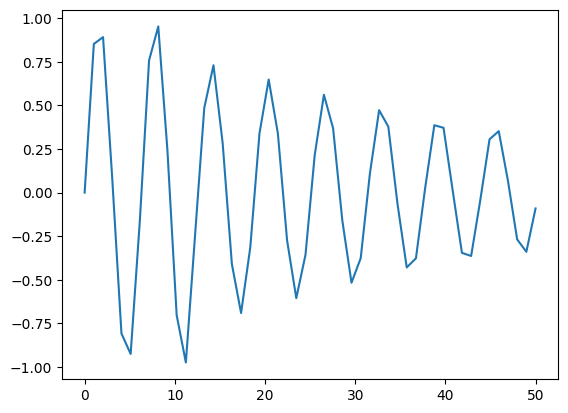

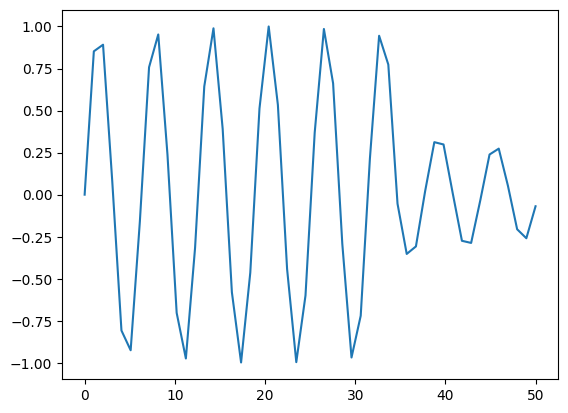

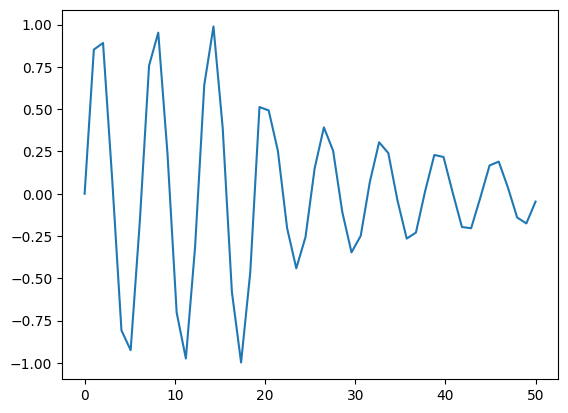

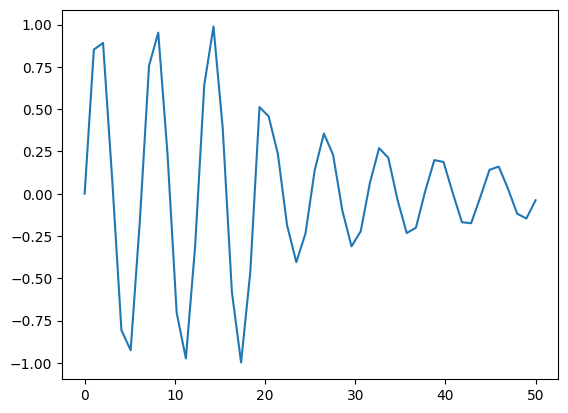

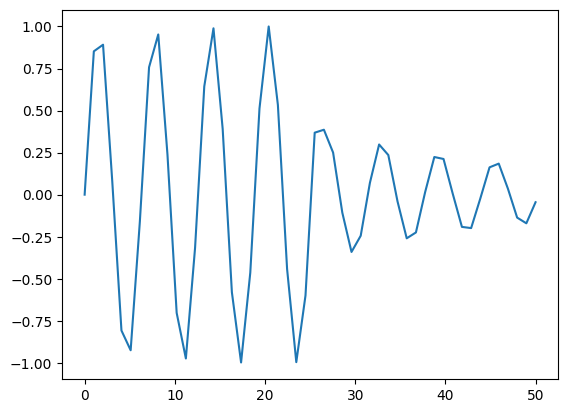

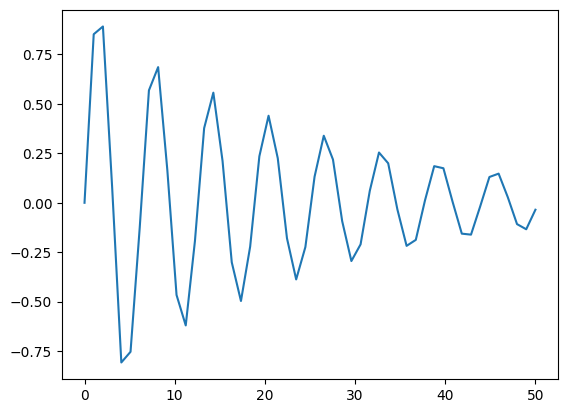

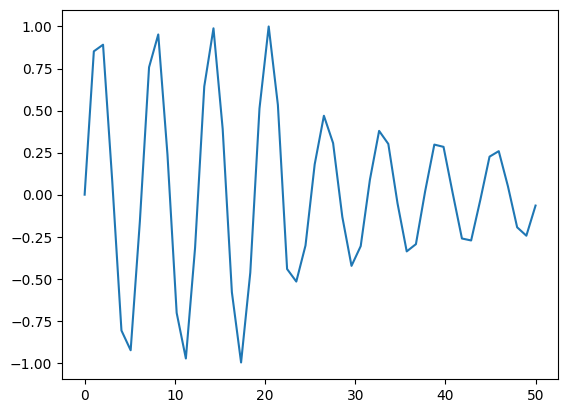

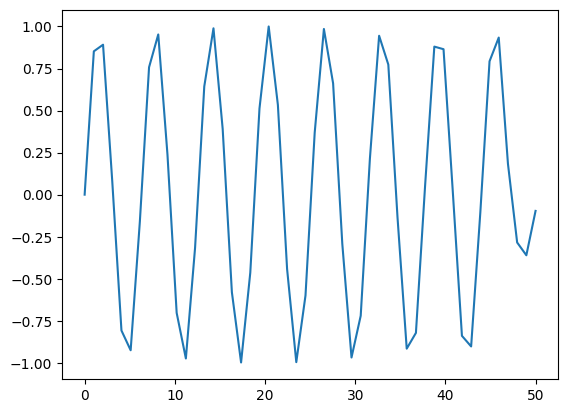

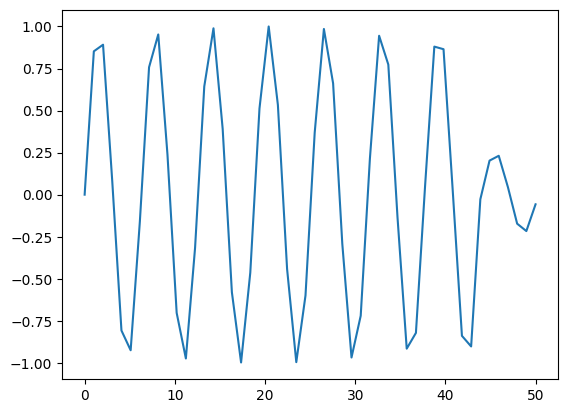

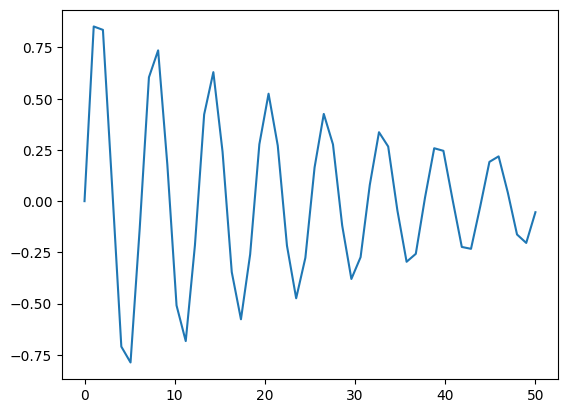

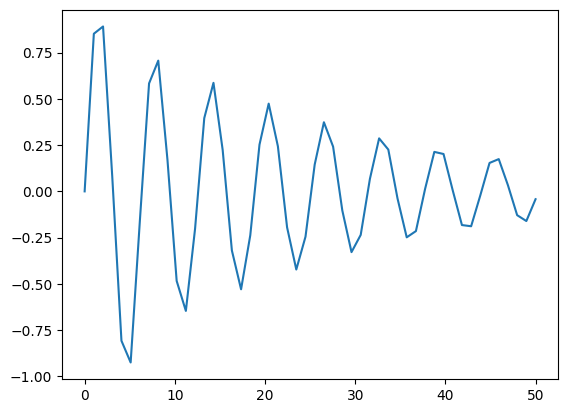

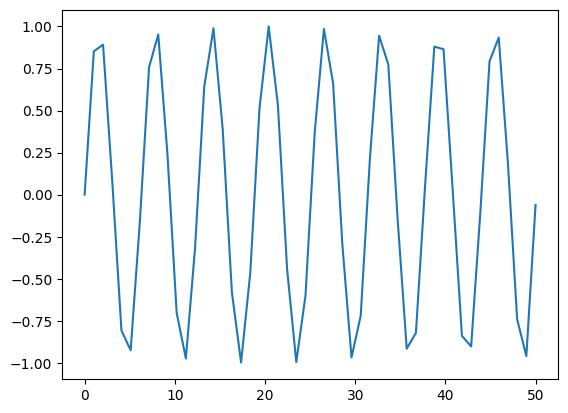

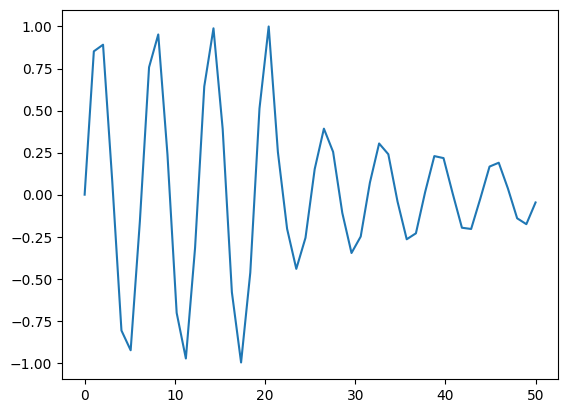

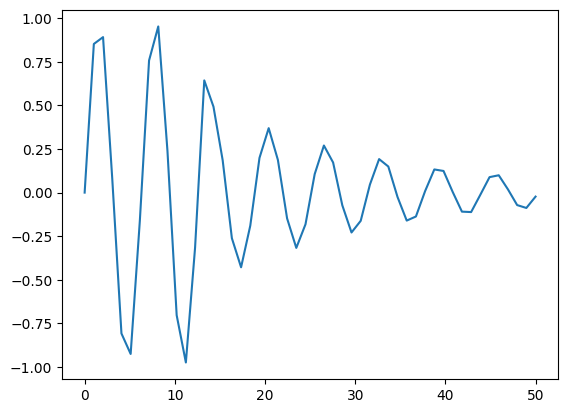

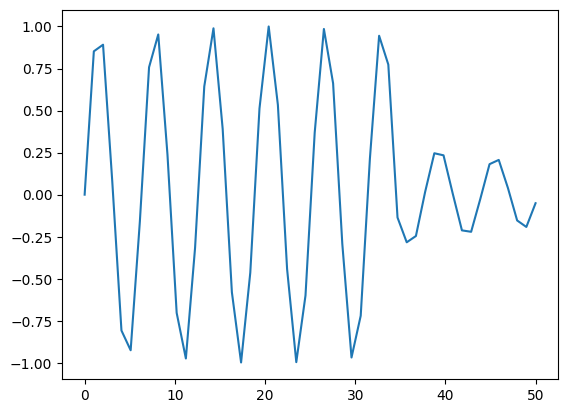

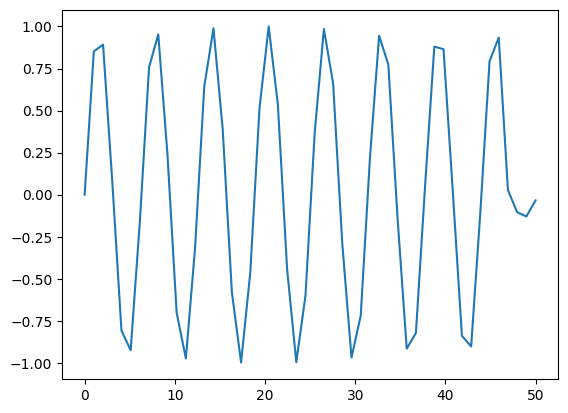

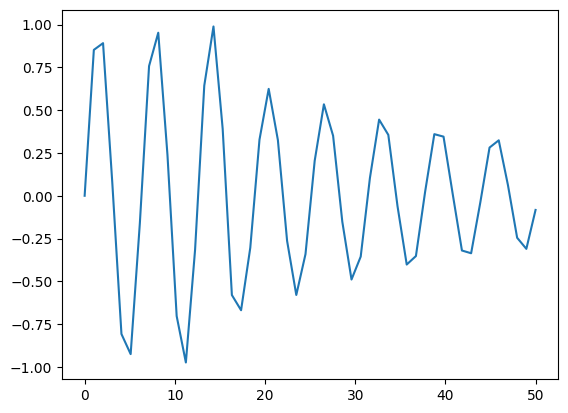

In [15]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
for i in(range(0,20)):
    plt.plot(inp[0][i], out[0][i])
    plt.show()

In [7]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
p1 = inp.reshape(200,50)

for i in np.shape(p1):
    for i in XC:


# 
# DEFINE O MODELO
# 

In [5]:
model_1 = Linear()
for m in model_1.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model_1.parameters())

model_2 = Linear()
for m in model_2.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model_2.parameters())

# Função de treino

In [7]:
def treine(model, inp, out, epochs):
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    inp = torch.as_tensor(inp.reshape(
        1, int(n_examples*n_batch*batch_size), 1))
    out = torch.as_tensor(out.reshape(
        1, int(n_examples*n_batch*batch_size), 1))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for n_batch_idx in range(n_batch):
            I = inp[n_batch_idx]
            A = out[n_batch_idx]
            # plt.plot(I,A)
            # plt.show()
            I = I.float()
            A = A.float()
            recon = model(I)
            loss = torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # s.exit()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')


treine(model_1, inp1, out1, 500)


Epoch:1,Loss:0.6019
Epoch:2,Loss:0.6019
Epoch:3,Loss:0.6019
Epoch:4,Loss:0.6019
Epoch:5,Loss:0.6019
Epoch:6,Loss:0.6019
Epoch:7,Loss:0.6019
Epoch:8,Loss:0.6019
Epoch:9,Loss:0.6019
Epoch:10,Loss:0.6019
Epoch:11,Loss:0.6019
Epoch:12,Loss:0.6019
Epoch:13,Loss:0.6019
Epoch:14,Loss:0.6019
Epoch:15,Loss:0.6019
Epoch:16,Loss:0.6019
Epoch:17,Loss:0.6019
Epoch:18,Loss:0.6019
Epoch:19,Loss:0.6019
Epoch:20,Loss:0.6019
Epoch:21,Loss:0.6019
Epoch:22,Loss:0.6019
Epoch:23,Loss:0.6019
Epoch:24,Loss:0.6019
Epoch:25,Loss:0.6019
Epoch:26,Loss:0.6019
Epoch:27,Loss:0.6019
Epoch:28,Loss:0.6019
Epoch:29,Loss:0.6019
Epoch:30,Loss:0.6019
Epoch:31,Loss:0.6019
Epoch:32,Loss:0.6019
Epoch:33,Loss:0.6019
Epoch:34,Loss:0.6019
Epoch:35,Loss:0.6019
Epoch:36,Loss:0.6019
Epoch:37,Loss:0.6019
Epoch:38,Loss:0.6019
Epoch:39,Loss:0.6019
Epoch:40,Loss:0.6019
Epoch:41,Loss:0.6019
Epoch:42,Loss:0.6019
Epoch:43,Loss:0.6019
Epoch:44,Loss:0.6019
Epoch:45,Loss:0.6019
Epoch:46,Loss:0.6019
Epoch:47,Loss:0.6019
Epoch:48,Loss:0.6019
E

In [22]:
interval = 200
Dataset(1,1,interval)

XC = (1, 1, 1)
inp = torch.Size([1, 1, 200]) 1 conjunto(s) de 1 exemplos, cada um com 200 pontos 
out = torch.Size([1, 1, 200])


In [22]:
interval = 33
test = pickle.load(open("inp1", "rb")).reshape(1,interval,1).float()
recon = model(test).reshape(1,1,interval)

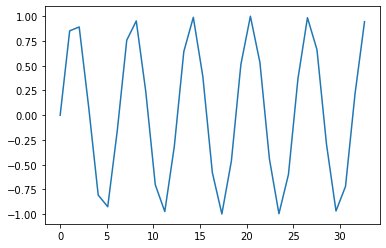

In [40]:
interval = 33
inp1 = pickle.load(open("inp1", "rb"))
out1 = pickle.load(open("out1", "rb"))
x=[]
y=[]
x = inp1.reshape(1,1,interval)
y = out1.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

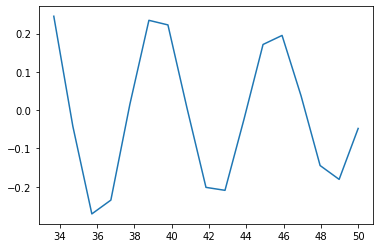

In [41]:
interval = 17
inp2 = pickle.load(open("inp2", "rb"))
out2 = pickle.load(open("out2", "rb"))
x=[]
y=[]
x = inp2.reshape(1,1,interval)
y = out2.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

ValueError: x and y must have same first dimension, but have shapes torch.Size([17]) and (33,)

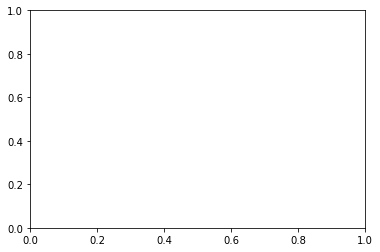

In [43]:
y = recon.detach().numpy()
x = inp2.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

ValueError: x and y must have same first dimension, but have shapes torch.Size([17]) and (33,)

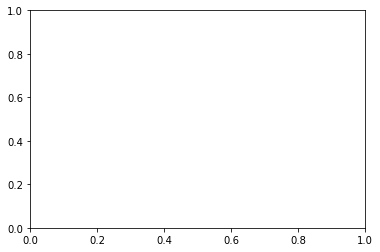

In [35]:
interval = 17
y = recon.detach().numpy()
#y = y2[::17]
x = inp2#.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

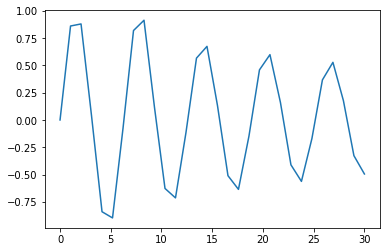

tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  1.0345,  2.0690,  3.1034,  4.1379,  5.1724,  6.2069,  7.2414,
         8.2759,  9.3103, 10.3448, 11.3793, 12.4138, 13.4483, 14.4828, 15.5172,
        16.5517, 17.5862, 18.6207, 19.6552, 20.6897, 21.7241, 22.7586, 23.7931,
        24.8276, 25.8621, 26.8966, 27.9310, 28.9655, 30.0000])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 1x300)

In [24]:
def treine(epochs):
    inp = pickle.load(open("inp", "rb"))
    out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            I = inp[batch_idx]
            A = out[batch_idx]
            plt.plot(I[0],A[0])
            plt.show()
            I = I.float()
            A = A.float()
            print(A[0])
            print('-'*20)
            print(A[0])
            print('-'*20)
            for i in I:
                for j in range(len(n_examples)):
                    print(i)
                    recon, latent = model(i[j])
                    loss = torch.mean((recon-A)**2)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        s.exit()



treine(200)
# print('end')
# -------------------------------------------------------------------------------
# --------------------- SALVANDO-------------------------------------------------
# -------------------------------------------------------------------------------
# PATH_save='Estado_Box_2_with_two_latent.pt'
##PATH_load = 'Estado_Box_2_with_two_latent.pt'
#torch.save(model.state_dict(), PATH_save)
# s.exit()
##model.load_state_dict(torch.load(PATH_load))
#torch.save(model.state_dict(), PATH_save)


# 
# GRÁFICOS
# 

In [ ]:
#inp = pickle.load(open("inp", "rb"))
#out = pickle.load(open("out", "rb"))


In [ ]:
def Latent_values_Scynet():
    for aux in range(n_batch):
        O = inp[aux].float()
        Q = question[aux].float()
        A = out[aux].float()
        j = J[aux]
        x = np.zeros(np.shape(j)[0])
        y1 = np.zeros(np.shape(j)[0])
        y2 = np.zeros(np.shape(j)[0])
        recon, latent = model(O, Q)
        for i in range(0, 499):
            x[i] = j[i]
            y1[i] = latent[i, 0]
            y2[i] = latent[i, 1]
        plt.scatter(x, y1, label='Latent Activation 1')
        plt.scatter(x, y2, label='Latent Activation 2')
        plt.xlabel('Momento angular total')
        plt.ylabel('Latent Activation')
        plt.legend()
        plt.pause(1.5)
        plt.close()

    plt.show()


Latent_values_Scynet()
# s.exit()
# -------------------------------------------------------------------------------


# An approach to predict when the prelude of mitosis occur